In [1]:
import nilmtk

# Load REDD Dataset

In [2]:
redd = nilmtk.DataSet("redd.h5")

## Building 1

In [3]:
building_1 = redd.buildings[1].elec

In [4]:
building_1.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

In [5]:
building_1.available_ac_types('power')

['apparent', 'active']

In [6]:
building_1.submeters().available_ac_types('power')

['active']

In [7]:
building_1.submeters()

MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=14, building=1, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])
  ElecMeter(insta

Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


<Axes: >

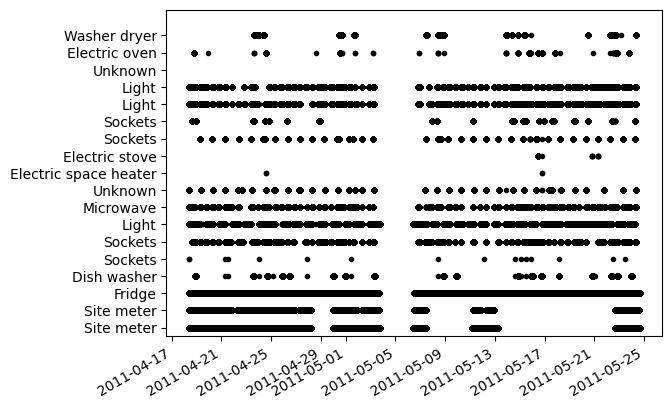

In [8]:
building_1.plot_when_on(on_power_threshold = 40)

## Main Meter

In [9]:
main_meter = building_1.mains()[1]

In [10]:
main_meter.total_energy()

E:\tsetlin.py\.venv\Lib\site-packages\nilmtk\results.py:77: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  self._data = pd.concat([self._data, row], verify_integrity=True, sort=False)
E:\tsetlin.py\.venv\Lib\site-packages\nilmtk\results.py:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self._data = pd.concat([self._data, row], verify_integrity=True, sort=False)
E:\tsetlin.py\.venv\Lib\site-packages\nilmtk\results.py:108: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future versio

apparent    99.271439
dtype: float64

<Axes: ylabel='Power (W)'>

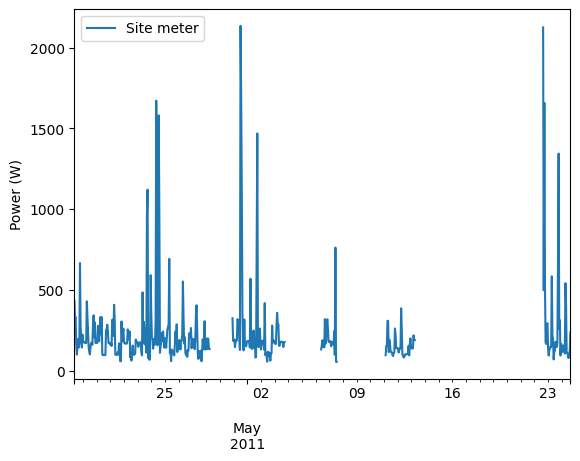

In [11]:
main_meter.plot()

## Fridge

In [12]:
fridge = building_1['fridge']

In [13]:
fridge.total_energy()

E:\tsetlin.py\.venv\Lib\site-packages\nilmtk\results.py:77: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  self._data = pd.concat([self._data, row], verify_integrity=True, sort=False)
E:\tsetlin.py\.venv\Lib\site-packages\nilmtk\results.py:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self._data = pd.concat([self._data, row], verify_integrity=True, sort=False)
E:\tsetlin.py\.venv\Lib\site-packages\nilmtk\results.py:108: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future versio

active    44.750925
dtype: float64

In [14]:
fridge.metadata

{'submeter_of': 0,
 'device_model': 'eMonitor',
 'data_location': '/building1/elec/meter5',
 'device': {'model': 'eMonitor',
  'manufacturer': 'Powerhouse Dynamics',
  'manufacturer_url': 'http://powerhousedynamics.com',
  'description': 'Measures circuit-level power demand.  Comes with 24 CTs. This FAQ page suggests the eMonitor measures real (active) power: http://www.energycircle.com/node/14103  although the REDD readme.txt says all channels record apparent power.\n',
  'sample_period': 3,
  'max_sample_period': 50,
  'measurements': [{'physical_quantity': 'power',
    'type': 'active',
    'upper_limit': 5000,
    'lower_limit': 0}],
  'wireless': False}}

<Axes: ylabel='Power (W)'>

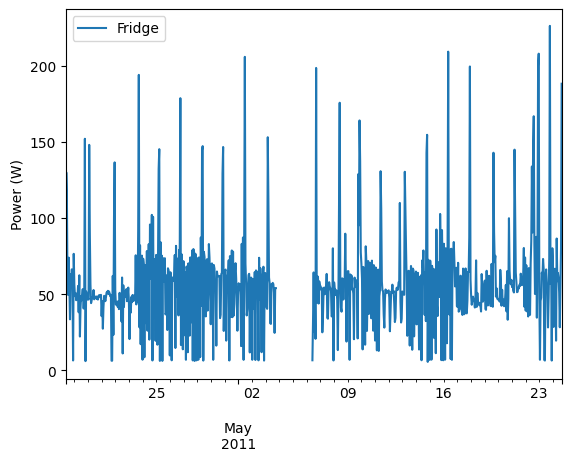

In [15]:
fridge.plot()

In [16]:
fridge.power_series_all_data()

2011-04-18 09:22:13-04:00      6.0
2011-04-18 09:22:16-04:00      6.0
2011-04-18 09:22:20-04:00      6.0
2011-04-18 09:22:23-04:00      6.0
2011-04-18 09:22:26-04:00      6.0
                             ...  
2011-05-24 15:56:20-04:00    186.0
2011-05-24 15:56:23-04:00    187.0
2011-05-24 15:56:27-04:00    190.0
2011-05-24 15:56:30-04:00    189.0
2011-05-24 15:56:34-04:00    186.0
Name: (power, active), Length: 745878, dtype: float32

## Experiment

In [17]:
from nilmtk.api import API

In [18]:
from nilmtk.disaggregate import CO, FHMMExact, Hart85, Mean

In [19]:
experiment1 = {
  'power': {'mains': ['apparent'],'appliance': ['active']},
  'sample_rate': 3,
  'appliances': ['fridge', 'microwave'],
  'methods': {"Mean":Mean({}), "Hart85":Hart85({}) , "FHMM_EXACT":FHMMExact({'num_of_states':3}), "CO":CO({})},
  'train': {    
    'datasets': {
        'REDD': {
            'path': './redd.h5',
            'buildings': {
                1: {
                    'start_time': '2011-04-18',
                    'end_time': '2011-05-18'
                    }
                }                
            }
        }
    },
  'test': {
    'datasets': {
        'REDD': {
            'path': './redd.h5',
            'buildings': {
                1: {
                    'start_time': '2011-05-19',
                    'end_time': '2011-05-24'
                    }
                }
            }
        },
        'metrics':['rmse', 'mae']
    }
}

In [20]:
api_results_experiment_1 = API(experiment1)

Joint Testing for all algorithms
Loading data for  REDD  dataset
Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Dropping missing values
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
............  rmse  ..............wave'
                 Mean      Hart85  FHMM_EXACT          CO
fridge     101.291412   76.691877  162.132547  473.169499
microwave  198.028230  222.022486  403.596565  572.881396
............  mae  ..............
                Mean     Hart85  FHMM_EXACT          CO
fridge     80.725418  35.275558  136.538971  228.122894
microwave  43.511482  96.861404  204.370499  258.585510
